# Housing

In [4]:
# import python packages

In [264]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn import pipeline
from sklearn import impute
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Dataset

In [27]:
housing_dataset = pd.read_csv('housing.csv')

### 查看数据结构

In [28]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



* 一共有20640条数据
* `total_beddrooms` 存在缺失值
* `ocean_proximity` object type, text, 可以通过value_counts查看有多少个分类

In [30]:
housing_dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120dd0510>,
      dtype=object)

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


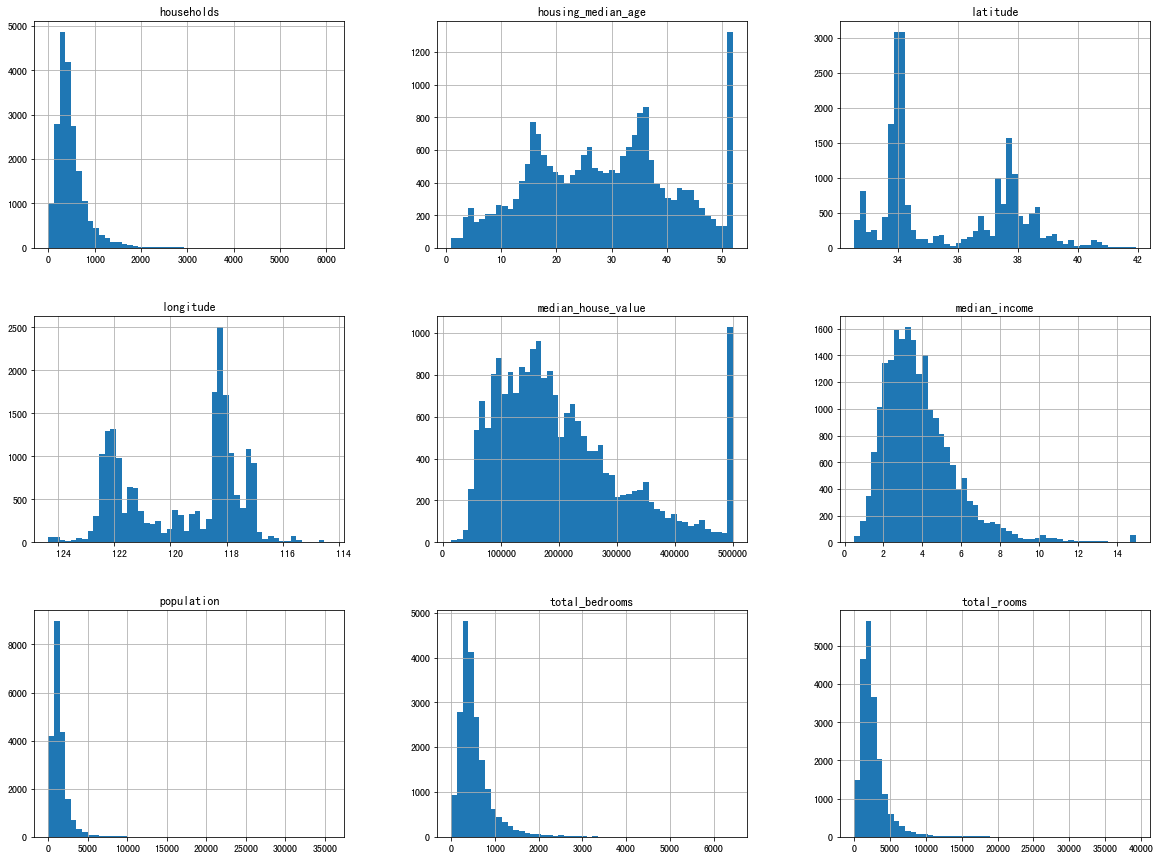

In [33]:
housing_dataset.hist(bins=50, figsize=(20,15))

### 创建测试集

In [26]:
# 创建收入类别

In [39]:
housing_dataset['income_cat'] = np.ceil(housing_dataset['median_income']/1.5)
housing_dataset['income_cat'].where(housing_dataset['income_cat'] < 5, 5.0, inplace=True)

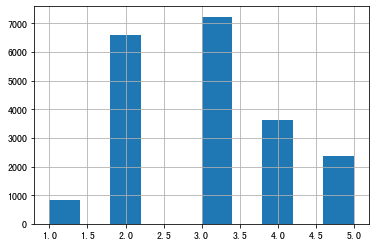

In [40]:
housing_dataset['income_cat'].hist()

In [46]:
housing_dataset['income_cat'].value_counts() / len(housing_dataset)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

根据收入类别分层抽样

In [44]:
split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_dataset, housing_dataset['income_cat']):
    strat_train_set = housing_dataset.loc[train_index]
    strat_test_set = housing_dataset.loc[test_index]

删除*income_cat*属性

In [54]:
# for dataset in (strat_train_set, strat_test_set):
#     dataset.drop(['income_cat'], axis=1, inplace=True)

### 从数据探索和可是化获得洞见

> 只能探索训练集

In [57]:
housing_train_set = strat_test_set.copy()

地理数据可视化

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


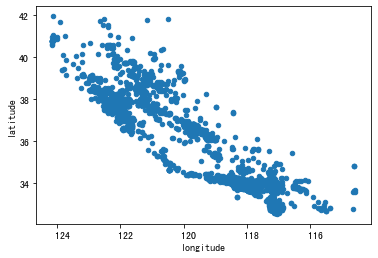

In [58]:
housing_train_set.plot(kind='scatter', x='longitude', y='latitude')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


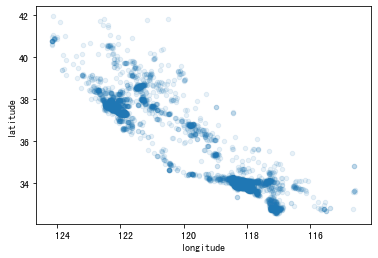

In [60]:
housing_train_set.plot(kind='scatter', x='longitude', y='latitude',  alpha=0.1)

No handles with labels found to put in legend.


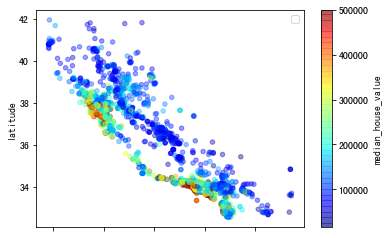

In [75]:
housing_train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                      c='median_house_value', cmap=plt.get_cmap('jet'))jjjjj
plt.legend()

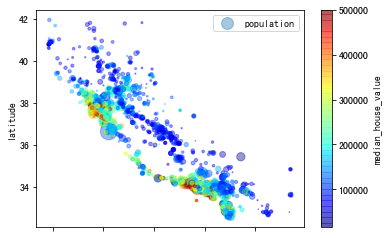

In [76]:
housing_train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                      s=housing_train_set['population']/100, label='population',
                      c='median_house_value', cmap=plt.get_cmap('jet'))
plt.legend()

房屋价格与地理位置（例如：靠海）和人口密度息息相关。

### 寻找相关性Correlatoins

In [79]:
corr_matrix = housing_train_set.corr()

In [80]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925427,-0.117459,0.028756,0.044227,0.069030,0.026599,0.002779,-0.039987
latitude,-0.925427,1.000000,0.032739,-0.024544,-0.047030,-0.084602,-0.046336,-0.098780,-0.150124
housing_median_age,-0.117459,0.032739,1.000000,-0.350579,-0.304904,-0.287569,-0.290718,-0.150099,0.071357
total_rooms,0.028756,-0.024544,-0.350579,1.000000,0.933670,0.864076,0.918788,0.191765,0.131435
total_bedrooms,0.044227,-0.047030,-0.304904,0.933670,1.000000,0.882714,0.978294,0.000079,0.057568
population,0.069030,-0.084602,-0.287569,0.864076,0.882714,1.000000,0.916114,0.014374,-0.016033
households,0.026599,-0.046336,-0.290718,0.918788,0.978294,0.916114,1.000000,0.021822,0.071242
median_income,0.002779,-0.098780,-0.150099,0.191765,0.000079,0.014374,0.021822,1.000000,0.691831
median_house_value,-0.039987,-0.150124,0.071357,0.131435,0.057568,-0.016033,0.071242,0.691831,1.000000


> `corr()`通过皮尔逊系数计算属性的相关性。

每个属性与房屋中位数的相关性分别是多少？

In [84]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

相关系数的范围变化从-1到1，越接近1，表示越有强的正相关。例如：收入中位数与房价。当系数越接近-1，表示越强的负相关，例如维度与房价中位数.

`scatter_matrix`绘制属性的相关性

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12393d050>,
      dtype=object)

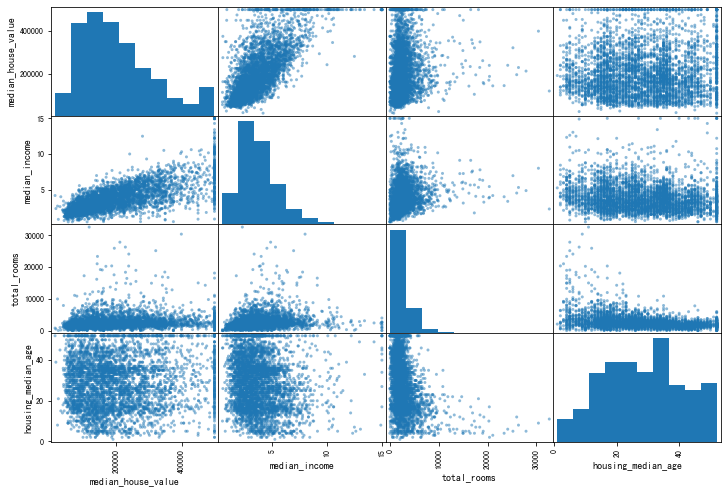

In [89]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_train_set[attributes], figsize=(12, 8))

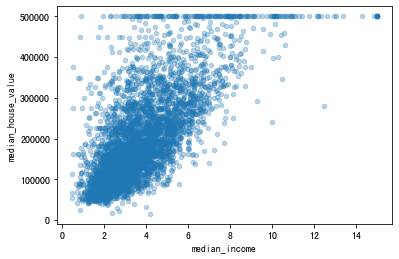

In [94]:
housing_train_set.plot(kind='scatter',  x='median_income', y='median_house_value',  alpha=0.3)

>  收入中位数与房间中位数的关系

二者的相关性很强。其次，超过50万美元的价格上限在图上是一条水平线。为了避免算法学习之后，重现这些怪异的数据，可能尝试删除这些相应地区。

### 试验不同属性的组合Attribute combination

In [97]:
housing_train_set['rooms_per_household'] = housing_train_set['total_rooms']/housing_train_set['households']
housing_train_set['bedrooms_per_room'] = housing_train_set['total_bedrooms']/housing_train_set['total_rooms']
housing_train_set['population_per_household'] = housing_train_set['population']/housing_train_set['households']

In [99]:
corr_matrix = housing_train_set.corr()

In [100]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925427,-0.117459,0.028756,0.044227,0.069030,0.026599,0.002779,-0.039987,-0.024136,0.081438,0.093804
latitude,-0.925427,1.000000,0.032739,-0.024544,-0.047030,-0.084602,-0.046336,-0.098780,-0.150124,0.104631,-0.102061,-0.082616
housing_median_age,-0.117459,0.032739,1.000000,-0.350579,-0.304904,-0.287569,-0.290718,-0.150099,0.071357,-0.196934,0.133597,-0.007196
total_rooms,0.028756,-0.024544,-0.350579,1.000000,0.933670,0.864076,0.918788,0.191765,0.131435,0.179008,-0.172028,-0.085983
total_bedrooms,0.044227,-0.047030,-0.304904,0.933670,1.000000,0.882714,0.978294,0.000079,0.057568,0.008595,0.074580,-0.106224
population,0.069030,-0.084602,-0.287569,0.864076,0.882714,1.000000,0.916114,0.014374,-0.016033,-0.064101,0.026363,0.089992
households,0.026599,-0.046336,-0.290718,0.918788,0.978294,0.916114,1.000000,0.021822,0.071242,-0.073823,0.057550,-0.098503
median_income,0.002779,-0.098780,-0.150099,0.191765,0.000079,0.014374,0.021822,1.000000,0.691831,0.432610,-0.581758,-0.026001
median_house_value,-0.039987,-0.150124,0.071357,0.131435,0.057568,-0.016033,0.071242,0.691831,1.000000,0.192575,-0.240362,-0.135142
rooms_per_household,-0.024136,0.104631,-0.196934,0.179008,0.008595,-0.064101,-0.073823,0.432610,0.192575,1.000000,-0.547643,0.004799


In [103]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

### 机器学习算法的数据准备

In [106]:
# 创建数据副

housing = strat_train_set.drop('median_house_value', axis=1)
housing_lables = strat_train_set['median_house_value'].copy()

In [107]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


#### 处理数据缺失


* 放弃这部分数据
* 放弃这个属性
* 将缺失值设置为某个值(0, 平均数，中位数)

通过DataFrame的dropna(), drop()和fillna()可以实现这些操作.

In [118]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [119]:
median = housing['total_bedrooms'].median()

In [126]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### 处理文本分类和类别属性(Categorical Attributes)

Scikit-learn 提供了LabelEncoder处理类别属性。

In [140]:
encoder = preprocessing.LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)

encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

**这种表征方式有一个缺点，机器学习算法会认为两个相近的数比相远的数更为近似些，实际情况并非如此。为了解决这个问题，我们提出了one-hot编码**

In [141]:
encoder = preprocessing.OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [145]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [151]:
# convert to numpy array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

使用*LabelBinarizer*可一次完成两个转换

1. 从文本转化成整数类别
2. 从整数类别转换成one-hot

In [155]:
encoder = preprocessing.LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

#### 特征缩放Feature Scaling

最小-最大缩放（归一化）和标准化

最小-最大缩放，也叫归一化Normalization，将数值缩放到0-1之间。 Scikit-learn 提供了`MinMaxScaler`的转换器。
$$norm = \frac{x - min}{max - min}$$

标准化Standardization, 使得结果的分布具备单位方差。Scikit-learn提供了`StandardScaler`的转换器.
$$\frac{X-\mu}{\sigma}$$

#### 自定义转换器

In [204]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttribuesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None,):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [205]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [213]:
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = preprocessing.LabelBinarizer(*args, **kwargs)

    def fit(self, X, y=None):
        return self.encoder.fit(X)

    def transform(self, X, y=None):
        return self.encoder.transform(X)


#### 转换流水线 Transform Pipeline

Pipeline除了最后一个是estimator外，前面必须是Transform。

In [171]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [206]:
num_attribs = list(set(list(strat_train_set.columns)) - set(['ocean_proximity', 'median_house_value']))
cat_attribs = ['ocean_proximity']

In [214]:
num_pipeline = pipeline.Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', impute.SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttribuesAdder()),
    ('std_scaler', preprocessing.StandardScaler()),
])

In [218]:
cat_pipeline = pipeline.Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', CustomLabelBinarizer()),
])

In [219]:
full_pipeline = pipeline.FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [220]:
housing_prepared = full_pipeline.fit_transform(housing)

In [227]:
housing_prepared.shape, housing.shape

((16512, 16), (16512, 9))

## 选择和训练模型

先训练一个线性回归模型

In [233]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(housing_prepared, housing_lables)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MSE评估

In [238]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = metrics.mean_squared_error(housing_lables, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68877.1208817263

决策树模型

In [241]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_lables)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [244]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = metrics.mean_squared_error(housing_lables, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Overfitting

#### 交叉验证评估模型

In [247]:
scores = model_selection.cross_val_score(tree_reg, housing_prepared, housing_lables,
                                       scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)

In [251]:
rmse

array([65951.29224255, 64222.74224878, 70157.70910839, 69226.41217939,
       69758.42991495, 73718.88261878, 70711.90092342, 69147.566658  ,
       72532.75772692, 67477.70398431])

In [253]:
rmse.mean(), rmse.std()

(69290.53976054951, 2706.611203226549)

交叉验证不仅可以得到一个模型性能的评估值，还可以衡量该评估值的精确度。

Linear Model

In [261]:
lin_scores = model_selection.cross_val_score(lin_reg, housing_prepared, housing_lables,
                                            scoring='neg_mean_squared_error', cv=10)
lin_scores = np.sqrt(-lin_scores)

In [262]:
lin_scores

array([67329.43251784, 67649.10254885, 68458.01470633, 74598.06706989,
       67997.83744592, 71373.46761602, 65141.42817846, 68517.26515094,
       71839.45737646, 67867.31125704])

In [263]:
lin_scores.mean(), lin_scores.std()

(69077.13838677366, 2594.0915371878723)

Random Forest Model

In [265]:
from sklearn.ensemble import RandomForestRegressor

In [285]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_lables)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [273]:
forest_scores = model_selection.cross_val_score(forest_reg, housing_prepared, housing_lables,
                                                scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-forest_scores)

In [274]:
forest_scores.mean(), forest_scores.std()

(49079.74960596158, 1901.795580543259)

#### 网格搜索Grid Search

In [275]:
from sklearn.model_selection import GridSearchCV

In [276]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max__features': [2, 4, 6, 8]},
]

In [278]:
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(housing_prepared, housing_lables)

## 测试集评估系统

In [279]:
X_test = strat_test_set.drop('median_house_value',  axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [289]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = forest_reg.predict(X_test_prepared)

In [290]:
final_mse = metrics.mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [291]:
final_rmse

46751.338119092055

## 总结

## 机器学习项目流程

### 确定目标是什么？

* 选择合适的学习方式，监督学习、无监督学习、半监督学习还是增强学习
* 确定什么任务，分类、回归还是其他

### 收集数据

#### 分析数据结构

* `head()` 对数据有一个感官的认识
* `info()` 查看数据有多少条entries, 每列数据的格式，有没有缺失值
* `describe()` 查看每列数据的count, mean, std, min, max的统计信息
* `hist()` 查看每列数据分布

#### 分割数据集，将数据集分为训练集和测试集

> 切分时，注意数据的分布，参考Scikit-learn分层分布StratifiedShuflleSplit，需不需要shuffle等

#### 进一步通过可视化等分析数据

* 通过t-sne等工具可视化数据集
* 地理数据可视化
* `corr()`分析特征的相关性
* 组合不同属性的数据

### 数据预处理

* 数据缺失值的处理，参考Scikit-learn impute package
* Numerical特征数据
* Categorical特征数据，LabelEncoder, OneHotEncode, LabelBinarizer等编码方式
* 构建数据处理的pipeline

### 模型的选择、评估

* N-fold Cross Validation
* Grid Search
* metrics

### 评估模型测试集Performance

### 模型上线，持续优化模型